# WeRateDogs Wrangling/Analysis

## GATHER

In [1]:
import pandas as pd

df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:
import requests

response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response

<Response [200]>

In [3]:
with open('image-predictions.tsv', 'wb') as f:
    f.write(response.content)

In [4]:
image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
'''
import tweepy
import json

consumer_key = '*********'
consumer_secret = '**********'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
'''

"\nimport tweepy\nimport json\n\nconsumer_key = '*********'\nconsumer_secret = '**********'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)\n"

In [6]:
#tweet_ids = df['tweet_id']
#tweet_ids[tweet_ids.isnull()]

In [7]:
'''
json_lines = []

for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(str(tweet_id), tweet_mode='extended')
        tweet_json = json.dumps(tweet._json)
        json_lines.append(tweet_json)
    except:
        print('request failed for tweet id: ' + str(tweet_id))
    
print(json_lines)
'''

"\njson_lines = []\n\nfor tweet_id in tweet_ids:\n    try:\n        tweet = api.get_status(str(tweet_id), tweet_mode='extended')\n        tweet_json = json.dumps(tweet._json)\n        json_lines.append(tweet_json)\n    except:\n        print('request failed for tweet id: ' + str(tweet_id))\n    \nprint(json_lines)\n"

In [8]:
#with open('tweet_likes_retweets.csv', 'w') as f:
#   f.write('\n'.join(json_lines))

In [9]:
import json
import numpy as np

with open('tweet_json.txt', 'r') as f:
    json_lines = f.readlines()

In [10]:
#Loading in json tweets from text file
data = {
    'tweet_id': [],
    'favorites': [],
    'retweets': []
}

for line in json_lines:
    current_entry = json.loads(line)

    data['tweet_id'].append(current_entry['id'])
    data['favorites'].append(str(current_entry['favorite_count']))
    data['retweets'].append(str(current_entry['retweet_count']))
    
tweepy_df = pd.DataFrame.from_dict(data)

# Assess

In [11]:
df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2228,668256321989451776,NaN,NaN,2015-11-22 02:34:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jareld. Jareld rules these waters. Lad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668256321...,13,10,Jareld,None,None,None,None
373,828376505180889089,NaN,NaN,2017-02-05 22:55:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Beebop. Her name means ""Good Dog"" in r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828376505...,13,10,Beebop,None,None,None,None
1116,732585889486888962,NaN,NaN,2016-05-17 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When your teacher agreed on 10,000 RTs and no ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/732585889...,10,10,None,None,None,None,None
1684,681679526984871937,NaN,NaN,2015-12-29 03:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can you spot Toby the guilty pupper? 7/10 woul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681679526...,7,10,None,None,None,pupper,None
1739,679511351870550016,NaN,NaN,2015-12-23 03:58:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to William. He makes fun of others b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679511351...,7,10,William,None,None,None,None
1612,685321586178670592,NaN,NaN,2016-01-08 04:46:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He sleeps like a psychopath. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685321586...,10,10,Rocky,None,None,None,None
1238,712097430750289920,NaN,NaN,2016-03-22 02:03:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't even comprehend how confused this dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712097430...,10,10,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
867,761976711479193600,NaN,NaN,2016-08-06 17:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shelby. She finds stuff to put on her ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761976711...,12,10,Shelby,None,None,None,None


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
pd.set_option('display.max_colwidth', -1)
df.query('rating_denominator == "11"')[['tweet_id', 'text']]

,tweet_id,text
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…"
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


In [15]:
df.query('rating_denominator == "15"')[['tweet_id', 'text']]

,tweet_id,text
342,832088576586297345,@docmisterio account started on 11/15/15


In [16]:
df.query('rating_denominator == "2"')[['tweet_id', 'text']]

,tweet_id,text
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [17]:
df.query('rating_denominator == "7"')[['tweet_id', 'text']]

,tweet_id,text
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [18]:
df.query('rating_denominator == "0"')[['tweet_id', 'text']]

,tweet_id,text
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"


In [19]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [20]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
tweepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null int64
favorites    2331 non-null object
retweets     2331 non-null object
dtypes: int64(1), object(2)
memory usage: 54.7+ KB


# Notes

### Quality
- main_df: The data type for the timestamp on the tweets should be datetime as opposed to an object
- main_df: Some dogs names come out as 'a' presumably because the program that filtered those out based on the regex 'This is'
- main_df: The denominator of '11' was parsed incorrectly due to the naming of the date 9/11 for 775096608509886464 740373189193256964 682962037429899265
- main_df: the denominator of 0, 2 were parsed incorrectly and should be 10 835246439529840640 666287406224695296
- main_df: the denominator of 7, 15 was parsed incorrectly and should be removed as there weas no rating 810984652412424192 832088576586297345
- main_df: Missing entries for expanded urls
- main_df: Includes retweets
- tweepy_df: The data type on favorites and retweets should be an int
- tweepy_df: Favorites and Retweets information was missing for some of the tweets in the original db
- image_df: Has 2075 entries as opposed to 2356



### Tidiness
- The doggo, puppo, pupper, floofer columns can be condensed into one column to make it a category
- These tables should all be one as a tweet can be seen as one observational unit

# Clean

In [23]:
df_clean = df.copy()
image_df_clean = image_df.copy()
tweepy_df_clean = tweepy_df.copy()

### Define

main_df: The data type for the timestamp on the tweets should be datetime as opposed to an object

use pandas to_datetime function to fix this

### Clean

In [24]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], format='%Y-%m-%d %H:%M:%S +0000')

### Test

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Define

main_df: Some dogs names come out as 'a'/'an'/'the'/'such' presumably because the program that filtered those out based on the regex 'This is'

We will remove these names and replace them with 'None'

### Clean

In [26]:
df_clean.name.replace('a', 'None', inplace=True)
df_clean.name.replace('an', 'None', inplace=True)
df_clean.name.replace('the', 'None', inplace=True)
df_clean.name.replace('such', 'None', inplace=True)

### Test

In [27]:
df_clean.name.value_counts()

None         816
Charlie      12 
Lucy         11 
Cooper       11 
Oliver       11 
Tucker       10 
Lola         10 
Penny        10 
Winston      9  
Bo           9  
Sadie        8  
Bailey       7  
Daisy        7  
Buddy        7  
Toby         7  
Bella        6  
Koda         6  
Rusty        6  
Scout        6  
Stanley      6  
Jax          6  
Leo          6  
Milo         6  
Dave         6  
Jack         6  
Oscar        6  
Oakley       5  
George       5  
Louis        5  
Sammy        5  
            ..  
Terrenth     1  
Julio        1  
Tonks        1  
Blipson      1  
Skittle      1  
Simba        1  
Crouton      1  
Goliath      1  
River        1  
Ronnie       1  
Al           1  
Grey         1  
Tripp        1  
Sprout       1  
Brownie      1  
Sojourner    1  
Tayzie       1  
Butters      1  
Jebberson    1  
Obie         1  
Ralph        1  
Naphaniel    1  
Karl         1  
Jaspers      1  
Petrick      1  
Jordy        1  
Major        1  
Dietrich     1

### Define

- main_df: The denominator of '11' was parsed incorrectly due to the naming of the date 9/11 for 775096608509886464 740373189193256964 682962037429899265

These rows will have their values switched manually to 10 as there aren't too many

### Clean

In [28]:
df_clean.loc[df_clean[df_clean['tweet_id'] == 775096608509886464].index, 'rating_denominator'] = 10
df_clean.loc[df_clean[df_clean['tweet_id'] == 740373189193256964].index, 'rating_denominator'] = 10
df_clean.loc[df_clean[df_clean['tweet_id'] == 682962037429899265].index, 'rating_denominator'] = 10

### Test

In [29]:
df_clean[df_clean['tweet_id'] == 775096608509886464]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,10,None,None,None,None,None


In [30]:
df_clean[df_clean['tweet_id'] == 740373189193256964]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,10,None,None,None,None,None


In [31]:
df_clean[df_clean['tweet_id'] == 682962037429899265]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,10,Darrel,None,None,None,None


### Define

- main_df: the denominator of 0, 2 were parsed incorrectly and should be 10 835246439529840640 666287406224695296

The same procedure as above will be used

### Clean

In [32]:
df_clean.loc[df_clean[df_clean['tweet_id'] == 835246439529840640].index, 'rating_denominator'] = 10
df_clean.loc[df_clean[df_clean['tweet_id'] == 666287406224695296].index, 'rating_denominator'] = 10

### Test

In [33]:
df_clean[df_clean['tweet_id'] == 835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,10,None,None,None,None,None


In [34]:
df_clean[df_clean['tweet_id'] == 666287406224695296]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,10,None,None,None,None,None


### Define

main_df: the denominator of 7, 15 was parsed incorrectly and should be removed as there was no rating 810984652412424192 832088576586297345

These rows will be removed from the main df via a new assignment

### Clean

In [35]:
df_clean = df_clean[df_clean['tweet_id'] != 810984652412424192]
df_clean = df_clean[df_clean['tweet_id'] != 832088576586297345]

### Test

In [36]:
df_clean[df_clean['rating_denominator'] == 7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
df_clean[df_clean['rating_denominator'] == 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define

main_df: Missing entries for expanded urls

Keep all rows that aren't null for that column

### Clean

In [38]:
df_clean = df_clean[df_clean['expanded_urls'].notna()]

### Test

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2296 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2296 non-null datetime64[ns]
source                        2296 non-null object
text                          2296 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2296 non-null object
rating_numerator              2296 non-null int64
rating_denominator            2296 non-null int64
name                          2296 non-null object
doggo                         2296 non-null object
floofer                       2296 non-null object
pupper                        2296 non-null object
puppo                         2296 non-null object
dtypes: datetime64[ns](1

### Define

main_df: Includes retweets

Keep all rows that are nan for those columns and remove the columns afterwards as they will not be needed

### Clean

In [40]:
df_clean = df_clean[df_clean['retweeted_status_id'].isna()]
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2116 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2116 non-null datetime64[ns]
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null int64
rating_denominator       2116 non-null int64
name                     2116 non-null object
doggo                    2116 non-null object
floofer                  2116 non-null object
pupper                   2116 non-null object
puppo                    2116 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 248.0+ KB


### Define

- tweepy_df: The data type on favorites and retweets should be an int

Use pandas as_type method to convert these

### Clean

In [42]:
tweepy_df_clean['favorites'] = tweepy_df_clean.favorites.astype(int)
tweepy_df_clean['retweets'] = tweepy_df_clean.retweets.astype(int)

### Test

In [43]:
tweepy_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null int64
favorites    2331 non-null int64
retweets     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


### Define

- main_df: We don't want reply tweets

Remove these tweets from the df. We can drop these columns as well as they won't be utilized

### Clean

In [44]:
df_clean = df_clean[df_clean['in_reply_to_user_id'].isna()]
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

### Test

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2093 non-null int64
timestamp             2093 non-null datetime64[ns]
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null int64
rating_denominator    2093 non-null int64
name                  2093 non-null object
doggo                 2093 non-null object
floofer               2093 non-null object
pupper                2093 non-null object
puppo                 2093 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.6+ KB


### Define

- These tables should all be one as a tweet can be seen as one observational unit

We will use the pandas merge function to handle this.

### Clean

In [46]:
df_clean = pd.merge(df_clean, tweepy_df_clean, on='tweet_id', how='left')

In [47]:
df_clean = pd.merge(df_clean, image_df_clean, on='tweet_id', how='left')

### Test

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2092
Data columns (total 25 columns):
tweet_id              2093 non-null int64
timestamp             2093 non-null datetime64[ns]
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null int64
rating_denominator    2093 non-null int64
name                  2093 non-null object
doggo                 2093 non-null object
floofer               2093 non-null object
pupper                2093 non-null object
puppo                 2093 non-null object
favorites             2086 non-null float64
retweets              2086 non-null float64
jpg_url               1970 non-null object
img_num               1970 non-null float64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null object
p2                    1970 non-null object
p2_conf               19

### Define

- The doggo, puppo, pupper, floofer columns can be condensed into one column to make it a category

Condense this into one category column

### Clean

In [49]:
temporary_category_df = df_clean[['doggo', 'floofer', 'pupper', 'puppo']]

In [50]:
temporary_category_df['doggo'] = temporary_category_df['doggo'].replace('doggo', 1)
temporary_category_df['floofer'] = temporary_category_df['floofer'].replace('floofer', 1)
temporary_category_df['pupper'] = temporary_category_df['pupper'].replace('pupper', 1)
temporary_category_df['puppo'] = temporary_category_df['puppo'].replace('puppo', 1)
temporary_category_df['doggo'] = temporary_category_df['doggo'].replace('None', np.nan)
temporary_category_df['floofer'] = temporary_category_df['floofer'].replace('None', np.nan)
temporary_category_df['pupper'] = temporary_category_df['pupper'].replace('None', np.nan)
temporary_category_df['puppo'] = temporary_category_df['puppo'].replace('None', np.nan)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [51]:
df_clean['dog_category'] = temporary_category_df.idxmax(axis=1)

In [52]:
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2092
Data columns (total 22 columns):
tweet_id              2093 non-null int64
timestamp             2093 non-null datetime64[ns]
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null int64
rating_denominator    2093 non-null int64
name                  2093 non-null object
favorites             2086 non-null float64
retweets              2086 non-null float64
jpg_url               1970 non-null object
img_num               1970 non-null float64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null object
p2                    1970 non-null object
p2_conf               1970 non-null float64
p2_dog                1970 non-null object
p3                    1970 non-null object
p3_conf               1970 non-null float64
p3_dog                

### Define

- tweepy_df: Favorite and Retweet information was missing for some of the tweets in the original db

Assign df to all non null favorites and tweet rows

### Clean

In [54]:
df_clean = df_clean[df_clean['favorites'].notna()]
df_clean = df_clean[df_clean['retweets'].notna()]

### Test

In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2092
Data columns (total 22 columns):
tweet_id              2086 non-null int64
timestamp             2086 non-null datetime64[ns]
source                2086 non-null object
text                  2086 non-null object
expanded_urls         2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
favorites             2086 non-null float64
retweets              2086 non-null float64
jpg_url               1963 non-null object
img_num               1963 non-null float64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null object
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null object
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                

### Define

- image_df: Has 2075 entries as opposed to 2356

Assign df to entries that have nonnull values in those columns

### Clean

In [56]:
df_clean = df_clean[df_clean['jpg_url'].notna()]

### Test

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2092
Data columns (total 22 columns):
tweet_id              1963 non-null int64
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1963 non-null object
favorites             1963 non-null float64
retweets              1963 non-null float64
jpg_url               1963 non-null object
img_num               1963 non-null float64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null object
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null object
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                

In [58]:
df_clean = pd.read_csv('twitter_archive_master.csv', index_col=False)

# Analysis

In [4]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites',
       'retweets', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_category'],
      dtype='object')

### First Analysis
Let's see which category of dog gets a higher rating than the others on average.  We will only have 302 rows to work with here so we have to filter out the rest.

In [5]:
dog_groups = df_clean[df_clean['dog_category'].notna()].groupby('dog_category')
numerator_averages = dog_groups['rating_numerator'].mean()
denominator_averages = dog_groups['rating_denominator'].mean()


In [6]:
print('doggo average: ' + str(numerator_averages['doggo']/denominator_averages['doggo']))
print('floofer average: ' + str(numerator_averages['floofer']/denominator_averages['floofer']))
print('pupper average: ' + str(numerator_averages['pupper']/denominator_averages['pupper']))
print('puppo average: ' + str(numerator_averages['puppo']/denominator_averages['puppo']))

doggo average: 1.17777777778
floofer average: 1.2
pupper average: 1.07164179104
puppo average: 1.2


#### Conclusion
floofers and puppos were the highest rated dogs on average with puppers trailing behind by a decent amount.  This data set was quite small though so more sample would probably give us a better look at this aspect of the dataset.

### Second Analysis 

For this analysis we will identify the 5 dogs that get the most favorites on average for this account based on p1

In [30]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_category,year_and_month
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,35168.0,7421.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,2017-08
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,30435.0,5518.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,2017-08
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,22886.0,3645.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,2017-07
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,38461.0,7595.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,2017-07
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,36719.0,8173.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,2017-07


In [33]:
valid_dogs = df_clean[df_clean['p1_dog'] == True ].groupby('p1')

In [38]:
valid_dogs['favorites'].mean().sort_values()

p1
Brabancon_griffon                781.000000
Ibizan_hound                     983.000000
Japanese_spaniel                1174.000000
Tibetan_terrier                 1631.000000
groenendael                     1689.000000
standard_schnauzer              1782.000000
soft-coated_wheaten_terrier     2026.000000
Scottish_deerhound              2182.333333
Lhasa                           2341.000000
EntleBucher                     2373.000000
basenji                         2373.714286
Welsh_springer_spaniel          2418.000000
Maltese_dog                     2615.611111
redbone                         2890.500000
Dandie_Dinmont                  3052.500000
miniature_poodle                3058.000000
Scotch_terrier                  3154.000000
Shih-Tzu                        3385.705882
Sussex_spaniel                  3590.500000
Rhodesian_ridgeback             3608.750000
miniature_schnauzer             3653.500000
malinois                        3669.777778
papillon                     

#### Conclusion
After carrying out the analysis it seems that the 'Saluki', 'French bulldog', 'Afghan hound', 'Giant Schanuzer', 'black-and-tan coonhound' are the five most popular dogs by favorites on this page... assuming that the prediction on breed is correct.

### Third Analysis

We will look at number of favorites compared with date to see how this account has grown over the  years

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 22 columns):
tweet_id              1963 non-null int64
timestamp             1963 non-null object
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1963 non-null object
favorites             1963 non-null float64
retweets              1963 non-null float64
jpg_url               1963 non-null object
img_num               1963 non-null float64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null bool
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                1963 non-nul

In [8]:
#Datetimes converted back top object when pulled from csv so I'm reconverting them below
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [9]:
yearly_groups = df_clean.groupby(df_clean.timestamp.dt.year)

In [10]:
yearly_groups['favorites'].mean()

timestamp
2015     2243.807339
2016     7074.411887
2017    21788.397143
Name: favorites, dtype: float64

#### Conclusion
It seems that popularity increased rapidly with this account at a rate where favorites had multiplied by about 3 on average year over year.

# Visualization

For this visualization we will rerun the third analysis on a monthly level to see that more closely

In [11]:
df_clean['year_and_month'] = df_clean['timestamp'].dt.strftime('%Y-%m')

df_clean['year_and_month'].value_counts()

2015-12    359
2015-11    295
2016-01    166
2016-03    118
2016-02    108
2016-07     87
2016-06     79
2017-01     66
2016-10     65
2017-02     63
2016-09     62
2016-08     59
2016-05     56
2016-04     54
2016-12     53
2016-11     52
2017-07     49
2017-03     45
2017-06     43
2017-05     42
2017-04     40
2017-08      2
Name: year_and_month, dtype: int64

In [12]:
monthly_favorites_average = df_clean.groupby('year_and_month')['favorites'].mean()
monthly_favorites_average

year_and_month
2015-11     1143.128814
2015-12     3148.264624
2016-01     3595.783133
2016-02     3919.611111
2016-03     4104.372881
2016-04     4252.425926
2016-05     5668.017857
2016-06     9624.696203
2016-07     6342.287356
2016-08     9225.186441
2016-09    10070.177419
2016-10    11773.507692
2016-11    13191.846154
2016-12    15108.792453
2017-01    17820.560606
2017-02    16566.365079
2017-03    17863.088889
2017-04    21084.300000
2017-05    27230.047619
2017-06    26202.302326
2017-07    29039.306122
2017-08    32801.500000
Name: favorites, dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

Text(0.5,1,'Monthly Average of Favorites Per Tweet')

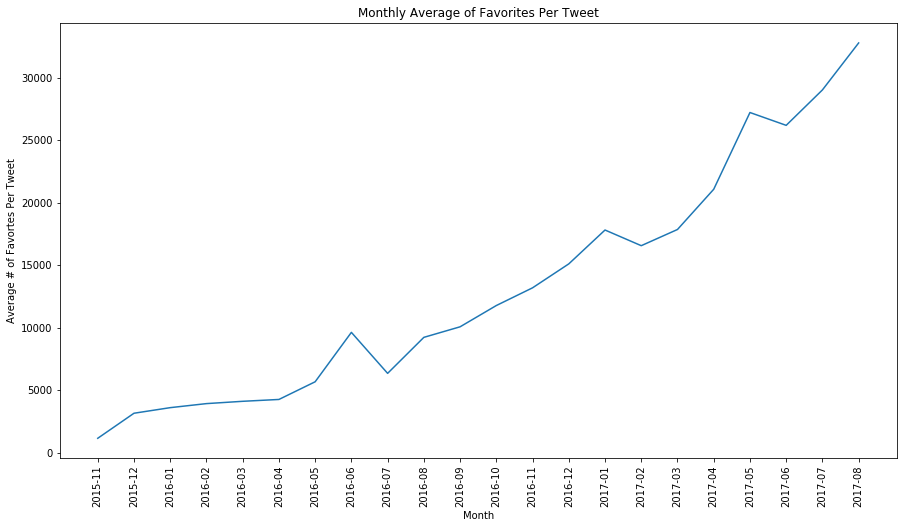

In [29]:
plt.figure(figsize=(15, 8))
plt.plot(monthly_favorites_average.index, monthly_favorites_average.values)
plt.xlabel('Month')
plt.ylabel('Average # of Favortes Per Tweet')
plt.xticks(rotation=90)
plt.title('Monthly Average of Favorites Per Tweet')
